In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

torch.manual_seed(0)


Using cpu device


In [2]:
x = np.linspace(-1, 1, 1000)
y = x ** 2


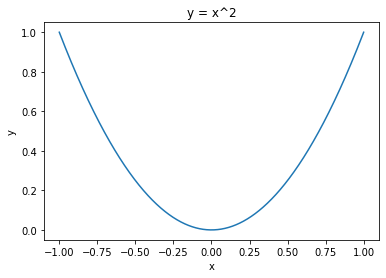

In [3]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.show()


In [4]:
class Net(torch.nn.Module):
    def __init__(self, hidden_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x

hidden_dim = 128
    
net = Net(hidden_dim).to(device)
net.fc2.weight


Parameter containing:
tensor([[-0.0876,  0.0399, -0.0424, -0.0590, -0.0509,  0.0508,  0.0468,  0.0678,
          0.0321, -0.0295, -0.0247,  0.0261,  0.0727,  0.0240, -0.0418, -0.0415,
         -0.0836,  0.0191, -0.0496, -0.0788,  0.0775, -0.0574, -0.0101,  0.0253,
          0.0028, -0.0595, -0.0714,  0.0705,  0.0144,  0.0733, -0.0296,  0.0260,
         -0.0202, -0.0039, -0.0538,  0.0299,  0.0279, -0.0018, -0.0199, -0.0545,
          0.0611, -0.0658,  0.0362, -0.0297, -0.0426,  0.0159, -0.0459,  0.0204,
          0.0174, -0.0656,  0.0147,  0.0376,  0.0350, -0.0111, -0.0725, -0.0136,
          0.0307, -0.0323,  0.0336,  0.0589, -0.0462,  0.0009,  0.0365,  0.0069,
          0.0074,  0.0110, -0.0695,  0.0069,  0.0612,  0.0796,  0.0520,  0.0118,
          0.0413, -0.0430, -0.0732, -0.0760,  0.0882,  0.0561, -0.0611,  0.0346,
          0.0667,  0.0884,  0.0773,  0.0685, -0.0203, -0.0310,  0.0726,  0.0495,
         -0.0532,  0.0795,  0.0427,  0.0482, -0.0554,  0.0254, -0.0310,  0.0691,
      

In [5]:
optim = torch.optim.Adam(net.parameters(), lr=0.01)

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1).to(device)
print(x_tensor.shape)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

for i in range(1000):
    loss = F.mse_loss(net(x_tensor).squeeze(-1), y_tensor, reduction='mean')
    
    writer.add_scalar('Loss', loss, i)
    optim.zero_grad()
    loss.backward()
    optim.step()

torch.Size([1000, 1])


In [6]:
y_pred = net(x_tensor).detach().cpu().numpy()

In [7]:
net.fc2.weight

Parameter containing:
tensor([[-0.0876,  0.0399,  0.0404, -0.0218, -0.0509,  0.1368,  0.0411,  0.1475,
          0.0262,  0.0701, -0.0199,  0.0191,  0.0636,  0.0191, -0.0460, -0.0415,
         -0.0836,  0.2184, -0.0553, -0.0255,  0.0775,  0.0195, -0.0101,  0.0253,
          0.0028, -0.0600, -0.0500,  0.0705,  0.0048,  0.0733,  0.0622,  0.1683,
          0.0594,  0.0787, -0.0538,  0.2081,  0.0822,  0.0644, -0.0199, -0.0461,
          0.0611, -0.0008,  0.0318,  0.0749, -0.0483,  0.0184, -0.0459,  0.0211,
          0.0666, -0.0656,  0.0127,  0.2625,  0.0605, -0.0111, -0.0702,  0.0062,
          0.0258, -0.0082,  0.0977,  0.1227, -0.0462, -0.0014,  0.0283,  0.0032,
          0.0074,  0.0105, -0.0695,  0.0069,  0.2879,  0.1073,  0.1682,  0.0476,
          0.0848, -0.0348,  0.0197,  0.0444,  0.0882,  0.0553, -0.0611,  0.0264,
          0.0889,  0.1312,  0.1377,  0.1213,  0.0003, -0.0310,  0.0968,  0.0718,
         -0.0532,  0.1883,  0.0392,  0.0482,  0.0321,  0.0219, -0.0006,  0.1052,
      

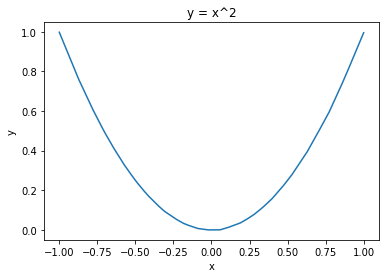

In [8]:
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.show()

In [12]:
print(y[0] - y_pred[0])
print(y[999] - y_pred[999])

[0.00294304]
[0.00531578]


In [13]:
net.parameters()

<generator object Module.parameters at 0x00000245654F84A0>

In [15]:
for i, j in enumerate(x):
    print(i, j)

0 -1.0
1 -0.997997997997998
2 -0.995995995995996
3 -0.993993993993994
4 -0.991991991991992
5 -0.98998998998999
6 -0.987987987987988
7 -0.985985985985986
8 -0.983983983983984
9 -0.9819819819819819
10 -0.97997997997998
11 -0.977977977977978
12 -0.975975975975976
13 -0.973973973973974
14 -0.9719719719719719
15 -0.96996996996997
16 -0.967967967967968
17 -0.965965965965966
18 -0.963963963963964
19 -0.9619619619619619
20 -0.95995995995996
21 -0.957957957957958
22 -0.955955955955956
23 -0.953953953953954
24 -0.9519519519519519
25 -0.94994994994995
26 -0.9479479479479479
27 -0.9459459459459459
28 -0.943943943943944
29 -0.9419419419419419
30 -0.93993993993994
31 -0.9379379379379379
32 -0.9359359359359359
33 -0.933933933933934
34 -0.9319319319319319
35 -0.92992992992993
36 -0.9279279279279279
37 -0.9259259259259259
38 -0.9239239239239239
39 -0.9219219219219219
40 -0.91991991991992
41 -0.9179179179179179
42 -0.9159159159159159
43 -0.9139139139139139
44 -0.9119119119119119
45 -0.9099099099099099
4